# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
#Constant Cities, Change to None after testing
MAX_CITIES = None

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the cities names
cities = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[:MAX_CITIES]):    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#Modify loop to slice

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | xilin hot
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | san fernando
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | kudahuvadhoo
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | port glaud
City not found. Skipping...
Processing Record 10 of Set 1 | cannonvale
Processing Record 11 of Set 1 | ulladulla
Processing Record 12 of Set 1 | wynyard
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | mili
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | cabedelo
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | ilulissat
Processing R

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,12.11,89,100,5.66,NZ,1687222593
1,xilin hot,43.9667,116.0333,18.21,53,5,6.77,CN,1687222593
2,blackmans bay,-43.0167,147.3167,8.62,70,53,3.84,AU,1687222593
3,san fernando,15.0286,120.6898,29.85,69,14,1.53,PH,1687222593
4,edinburgh of the seven seas,-37.0676,-12.3116,15.82,96,100,12.81,SH,1687222593


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,12.11,89,100,5.66,NZ,1687222593
1,xilin hot,43.9667,116.0333,18.21,53,5,6.77,CN,1687222593
2,blackmans bay,-43.0167,147.3167,8.62,70,53,3.84,AU,1687222593
3,san fernando,15.0286,120.6898,29.85,69,14,1.53,PH,1687222593
4,edinburgh of the seven seas,-37.0676,-12.3116,15.82,96,100,12.81,SH,1687222593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

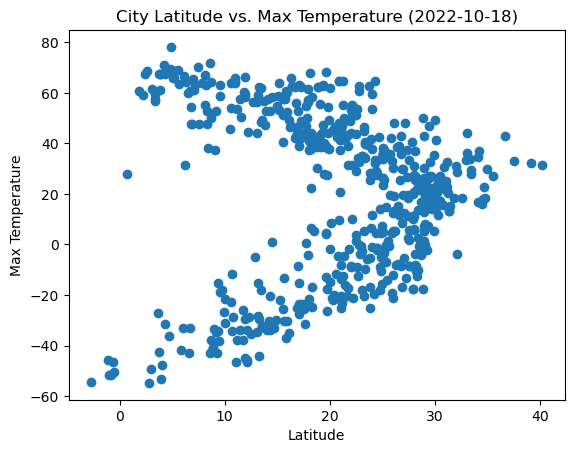

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

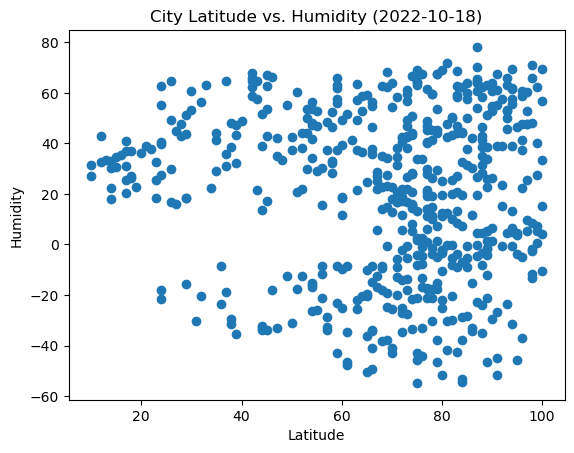

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

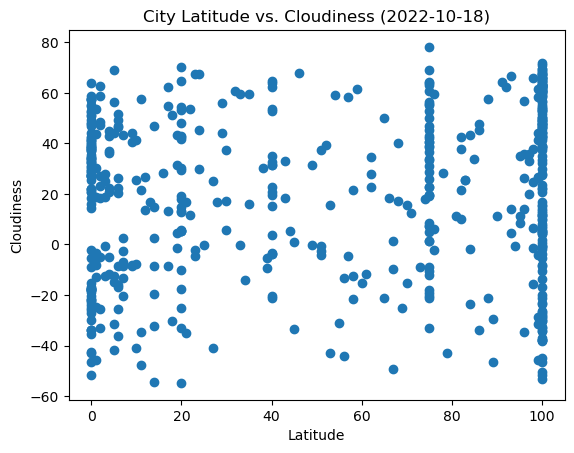

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

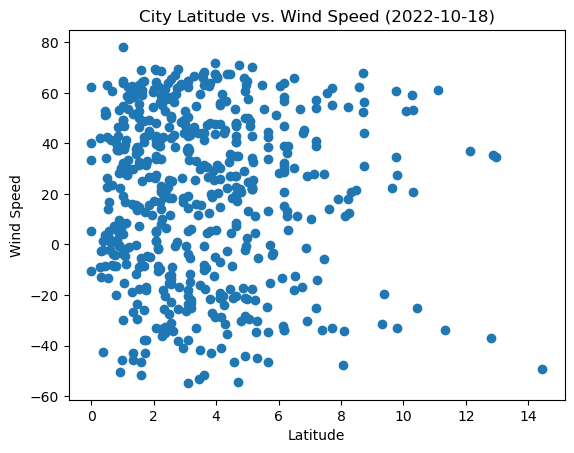

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,xilin hot,43.9667,116.0333,18.21,53,5,6.77,CN,1687222593
3,san fernando,15.0286,120.6898,29.85,69,14,1.53,PH,1687222593
5,kudahuvadhoo,2.6708,72.8944,28.39,76,14,4.99,MV,1687222594
7,college,64.8569,-147.8028,20.88,42,100,3.09,US,1687222387
11,bethel,41.3712,-73.4140,20.93,78,99,2.20,US,1687222595


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,12.11,89,100,5.66,NZ,1687222593
2,blackmans bay,-43.0167,147.3167,8.62,70,53,3.84,AU,1687222593
4,edinburgh of the seven seas,-37.0676,-12.3116,15.82,96,100,12.81,SH,1687222593
6,port elizabeth,-33.9180,25.5701,12.16,57,0,11.32,ZA,1687222594
8,cannonvale,-20.2833,148.7000,21.66,65,7,4.23,AU,1687222594


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6937559754615458


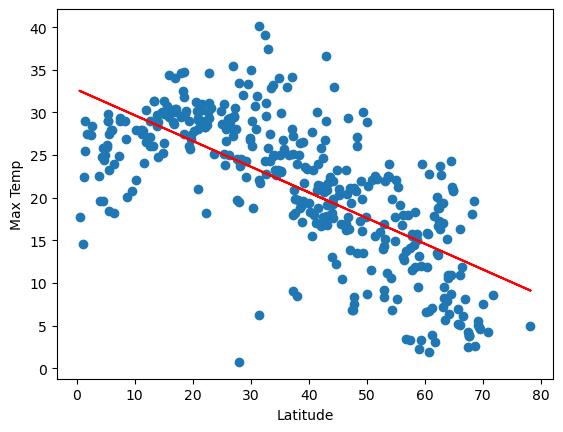

In [16]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.835748507348749


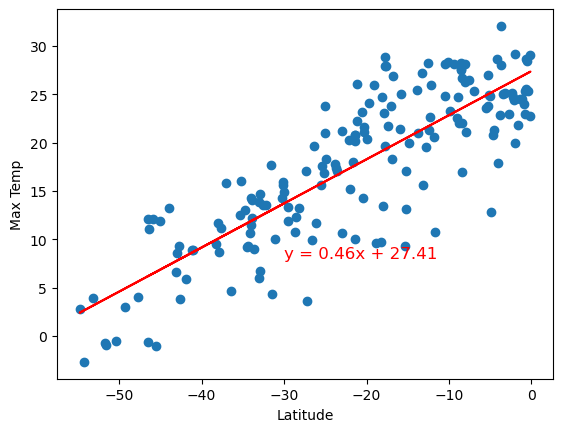

In [17]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** The linear regression is modeling the relationship bewtween temperature and the latitude. The northern hemisphere has a strong negative relationship between temperature and latitude. The southern hemisphere has a very strong positive relationship between temperature and latitude. The closer you are to the equator the warmer it is and the further you get from the equator the cooler it becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03429539966921589


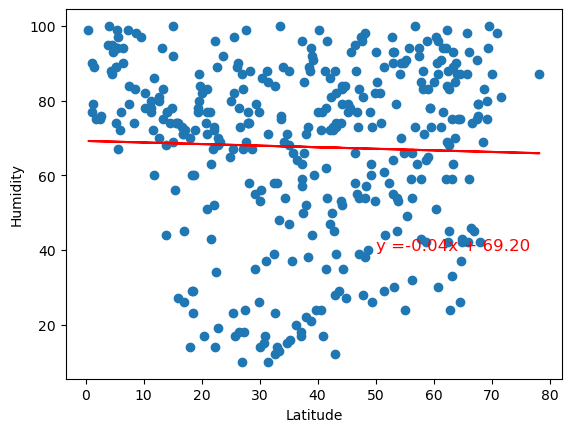

In [18]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.14311909117107713


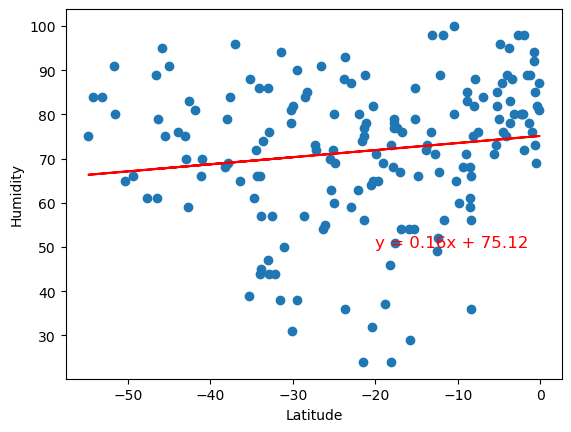

In [19]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** The linear regression is modeling the relationship bewtween humidity and the latitude of a city in either the northern or southern hemisphere. The northern hemisphere has a weak negative relationship between humidity and latitude. The southern hemisphere has a very weak positive relationship between humidity and latitude. There doesn't seem to be a great relationship between where a city is and how much humidity it recieves, the relationship seems more random.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12206044637950136


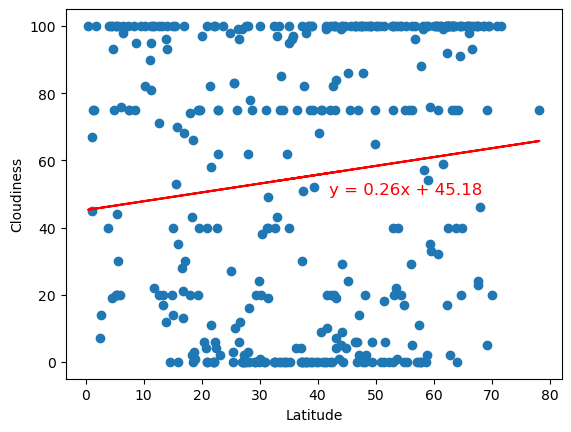

In [20]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: -0.09247440548485905


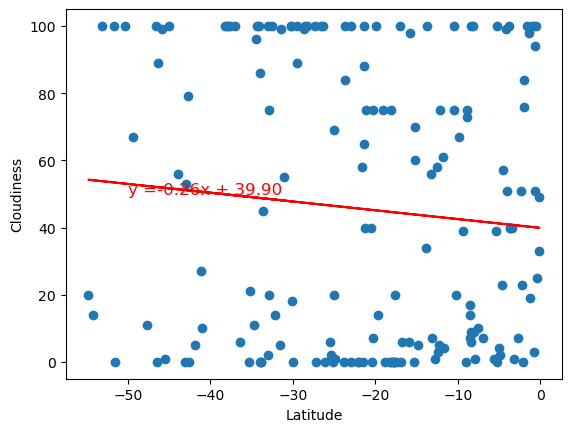

In [21]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))


**Discussion about the linear relationship:** The linear regression is modeling the relationship bewtween cloudiness and the latitude of a city in either in the northern or southern hemisphere. The northern hemisphere has a weak positve relationship between cloudiness and latitude. The southern hemisphere has a very weak positive relationship between cloudiness and latitude. There doesn't seem to be a great relationship between where a city is and how many clouds it recieves, the relationship seems more random.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04427519157395985


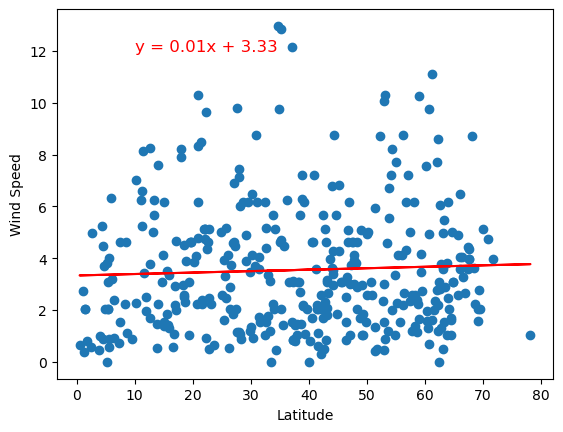

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.26247729254641805


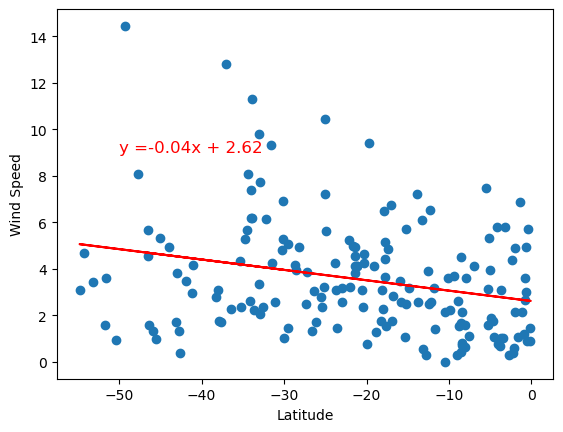

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** The linear regression is modeling the relationship bewtween humidity and the wind speed of a city in either the northern or southern hemisphere. The northern hemisphere has a weak positive relationship between wind speed and latitude. The southern hemisphere has a weak negaitve relationship between wind speed and latitude. There seems to be a stronger relationship in the southern hemisphere than in the northern hemisphere but still very weak relationships when it comes to wind speed and location.